The first five columns


,age,education_level,years_of_experience,technical_test_score,interview_score,previous_employment,suitable_for_employment
0,56.0,Bachelor's,32.0,73.9,5.3,No,Yes
1,46.0,Bachelor's,22.0,82.4,3.8,No,No
2,32.0,Bachelor's,9.0,43.6,7.1,Yes,No
3,60.0,High School,40.0,62.2,6.4,Yes,Yes
4,25.0,Master's,0.0,71.0,8.5,Yes,Yes


Basic dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      3868 non-null   float64
 1   education_level          3924 non-null   object 
 2   years_of_experience      3704 non-null   float64
 3   technical_test_score     3951 non-null   float64
 4   interview_score          3951 non-null   float64
 5   previous_employment      3924 non-null   object 
 6   suitable_for_employment  4000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 218.9+ KB


None


The sum of null values


age                        132
education_level             76
years_of_experience        296
technical_test_score        49
interview_score             49
previous_employment         76
suitable_for_employment      0
dtype: int64


 Datatypes of each column


age                        float64
education_level             object
years_of_experience        float64
technical_test_score       float64
interview_score            float64
previous_employment         object
suitable_for_employment     object
dtype: object


 Distribution of features in numeric columns


,age,years_of_experience,technical_test_score,interview_score
count,3868.000000,3704.000000,3951.000000,3951.000000
mean,41.536194,18.942765,64.884358,6.475804
std,13.746833,13.410508,19.309041,1.905243
min,18.000000,0.000000,0.000000,0.000000
25%,30.000000,7.000000,51.700000,5.100000
50%,42.000000,18.000000,65.300000,6.500000
75%,53.000000,30.000000,78.900000,7.800000
max,65.000000,47.000000,100.000000,10.000000



Distribution of features in categorical columns

Distribution of 'education_level':
education_level
Bachelor's     1801
High School     924
Master's        824
PhD             375
NaN              76
Name: count, dtype: int64

Percentage (%):
education_level
Bachelor's     45.02
High School    23.10
Master's       20.60
PhD             9.38
NaN             1.90
Name: proportion, dtype: float64

Distribution of 'previous_employment':
previous_employment
Yes    2746
No     1178
NaN      76
Name: count, dtype: int64

Percentage (%):
previous_employment
Yes    68.65
No     29.45
NaN     1.90
Name: proportion, dtype: float64

Distribution of 'suitable_for_employment':
suitable_for_employment
Yes    2163
No     1837
Name: count, dtype: int64

Percentage (%):
suitable_for_employment
Yes    54.08
No     45.92
Name: proportion, dtype: float64

null values in each column after replacing the missing values


age                        0
education_level            0
years_of_experience        0
technical_test_score       0
interview_score            0
previous_employment        0
suitable_for_employment    0
dtype: int64

Dataframe after encoding categorical characters


,age,education_level,years_of_experience,technical_test_score,interview_score,previous_employment,suitable_for_employment
0,56.0,2.0,32.0,73.9,5.3,0.0,1
1,46.0,2.0,22.0,82.4,3.8,0.0,0
2,32.0,2.0,9.0,43.6,7.1,1.0,0
3,60.0,1.0,40.0,62.2,6.4,1.0,1
4,25.0,3.0,0.0,71.0,8.5,1.0,1
...,...,...,...,...,...,...,...
3995,54.0,1.0,34.0,72.7,3.5,1.0,0
3996,55.0,2.0,31.0,70.9,8.1,1.0,1
3997,42.0,1.0,18.0,30.4,6.7,1.0,0
3998,19.0,4.0,0.0,72.2,6.9,1.0,1


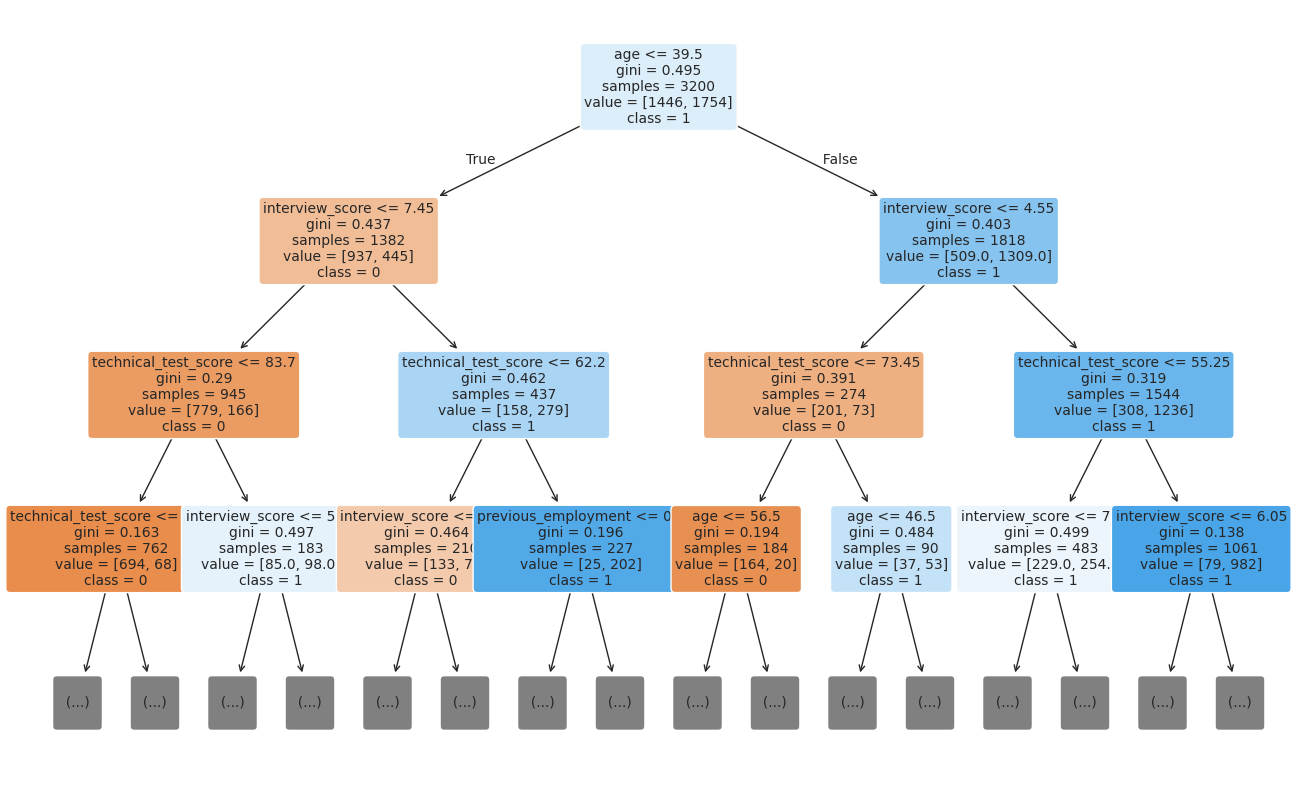

Predictions for the hypothetical candidate profiles
[1 1 1 0 1]


Accuracy of the classifier:  0.9175

Confusion Matrix: 
 [[353  38]
 [ 28 381]]




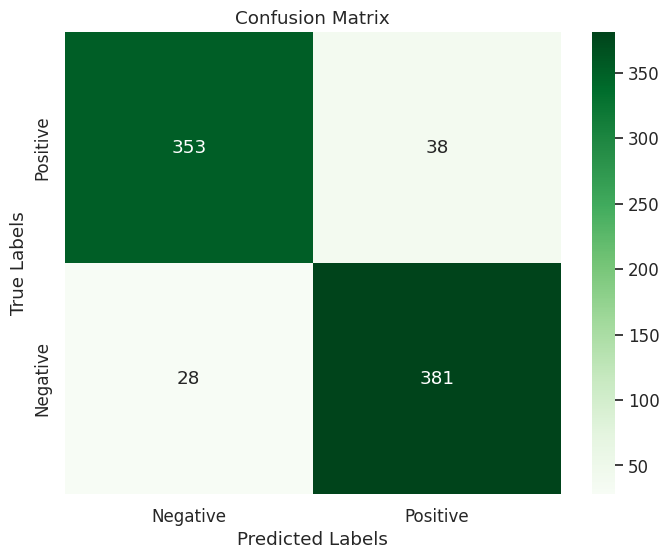


Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       391
           1       0.91      0.93      0.92       409

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



,Feature,Importance
4,interview_score,0.317907
0,age,0.264734
3,technical_test_score,0.264399
1,education_level,0.058259
5,previous_employment,0.054392
2,years_of_experience,0.040310


In [49]:
import pandas as pd  # Import the pandas library
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


df = pd.read_csv("./employment_dataset.csv",
                 header=0,
                 index_col=None)  # Read the csv file

# Display the first five rows
print("The first five columns")
display(df.head())

# print basic dataframe info
print("Basic dataframe info")
display(df.info())

# Check for null values in every column, and sum them up
print("\nThe sum of null values")
display(df.isnull().sum())

# Check the datatypes
print("\n Datatypes of each column")
display(df.dtypes)

# Check distribution of features
# For numeric columns
print("\n Distribution of features in numeric columns")
display(df.describe())

# For categorical columns
print("\nDistribution of features in categorical columns")
categorical_cols = ['education_level', 'previous_employment', 'suitable_for_employment']

for col in categorical_cols:
    print(f"\nDistribution of '{col}':")
    print(df[col].value_counts(dropna=False))
    print("\nPercentage (%):")
    print((df[col].value_counts(normalize=True, dropna=False) * 100).round(2))

# Handle null values first

# Missing values in categorical columns were filled with unknown
# For nmeric columns: 
# Missing age and years_of_experince values were replaced with median
# Missing technical_test_score and inerview_score values were replaced with mean
df.fillna({
    'age': df['age'].median(),
    'years_of_experience': df['years_of_experience'].median(),
    'technical_test_score': df['technical_test_score'].mean(),
    'interview_score': df['interview_score'].mean(),
    'education_level': 'unknown',
    'suitable_for_employment': 'unknown',
    'previous_employment': 'unknown'
}, inplace=True)

# print null values in each column after replacing the missing values
# (there should be none)
print("\nnull values in each column after replacing the missing values")
display(df.isnull().sum())

# Confirm categorical values into numeric format
# I will use label encoding for all categorical columns

# Label-encode suitable_for_employment
# A lebel encoder object
le = LabelEncoder()

# Encode the suitable_for_employment column
# Then Merge the encoded values into the main dataframe
# df['suitable_for_employment'] = le.fit_transform(df['suitable_for_employment'])
# I will just map manually to remove ambiguity
df['suitable_for_employment'] = df['suitable_for_employment'].map({
    'No': 0, 'Yes': 1})

# encode previously_employment column
df['previous_employment'] = df['previous_employment'].map({
    'No': 0, 'Yes': 1, 'Unknown': 2})

# Encode the education_level column
edu_map = {
    'Unknown': 0,
    'High School': 1,
    "Bachelor's": 2,
    "Master's": 3,
    'PhD': 4
}
df['education_level'] = df['education_level'].map(edu_map)

print("Dataframe after encoding categorical characters")
display(df)

# Train-test_split
train_set = df.sample(frac=0.8, replace=False, random_state=20)
test_set = df.drop(train_set.index)

# define the classifier
clf = DecisionTreeClassifier(random_state=1)

# Split the train set into input columns(x_train),
# and target column(y_train)
x_train = train_set.drop('suitable_for_employment', axis=1)
y_train = train_set['suitable_for_employment']

# Train the classifier
clf.fit(x_train, y_train)

# Plot and show the tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf,
    max_depth=3,  # Show only 3 levels
    filled=True,
    feature_names=x_train.columns,
    class_names=[str(cls) for cls in clf.classes_],
    rounded=True,
    fontsize=10
)
plt.show()

# Predict the labels for the test dataset
x_test = test_set.drop('suitable_for_employment', axis=1)  # Features
y_test = test_set['suitable_for_employment']  # Label

# Make predictions using the trained model
y_pred = clf.predict(x_test)

# Hypothetical candidate profiles
profiles = pd.DataFrame([
    [23, 1, 1, 65.4, 70.2, 0],
    [28, 2, 4, 85.7, 78.9, 1],
    [35, 3, 10, 92.3, 88.5, 1],
    [30, 1, 7, 55.8, 60.4, 1],
    [26, 0, 3, 75.1, 82.6, 0]
], columns=[
    'age', 'education_level', 'years_of_experience',
    'technical_test_score', 'interview_score', 'previous_employment'
])

predictions = clf.predict(profiles)
print("Predictions for the hypothetical candidate profiles")
print(predictions)

# Result - [1 1 1 0 1]
# Candidates 1, 2, 3, and 5 are suitable for employment
# Candidate 4 is not

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy of the classifier: ", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n", cm)
print("\n")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6), dpi=100)
sns.set(font_scale=1.1)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

plt.ylabel("True Labels")
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

plt.title("Confusion Matrix")
plt.show()

# Classification report
cr = classification_report(y_test, y_pred)
print("\nClassification report: \n", cr)

# Feature importance analysis
# Gini Importance
importances = clf.feature_importances_
feature_importance_def = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

display(feature_importance_def)